In [4]:
import cv2
import numpy as np
import glob
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Reading an image
images = [cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in glob.glob(r"E:\Aegis Docs\Capstone Project\samples\samples\*")]
labels = os.listdir(r'E:\Aegis Docs\Capstone Project\samples\samples')

In [70]:
#Creating Labels
new_label=[]
for i in range(len(labels)):
    new_label.append(list(labels[i][:-4]))  
flattened  = [val for sublist in new_label for val in sublist]

In [71]:
#Segmenting the Letters and String individual letters of Captcha

letter=[]
for j in range(len(images)):
    x, y, w, h = 33, 9, 20, 38
    for i in range(5):
     #Get bounding box
        cv2.rectangle(np.squeeze(images[j]),(x,y),( x + w, y + h ),(0,255,0),1)
        letter.append(np.squeeze(images[j])[y:y+h,x:x+w])
        x+=w

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(letter,flattened,test_size=0.2,random_state=45)

In [73]:
xtrain = np.array(xtrain)
#print(xtrain.shape)

xtest = np.array(xtest)
print(xtest.shape)

(1064, 38, 20)


In [74]:
ytrain = np.array(ytrain)
print(ytrain.shape)

ytest = np.array(ytest)
print(ytest.shape)

(4256,)
(1064,)


In [75]:
#Converting the Data to 4D 
img_width = 38
img_height = 20
X_train = xtrain.reshape(xtrain.shape[0], img_width, img_height, 1)
X_test = xtest.reshape(xtest.shape[0], img_width, img_height, 1)

In [76]:
#Creating Labels for training
encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(ytrain)

In [77]:
model = Sequential()

model.add(Conv2D(128,5,activation='relu',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(128,5,activation='relu',padding='same'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(64,5,activation='relu',padding='same'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(32,5,activation='relu',padding='same'))
model.add(MaxPooling2D(padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))

model.add(Dense(19,activation='softmax'))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 34, 16, 128)       3328      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 8, 128)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 8, 128)        409728    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 4, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 4, 64)          204864    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 2, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 2, 32)         

In [79]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:
model_hist= model.fit(X_train,transfomed_label,epochs=20,batch_size=128,validation_split=0.1)

Train on 3830 samples, validate on 426 samples
Epoch 1/20
3830/3830 [==============================] - 26s 7ms/sample - loss: 3.7164 - accuracy: 0.0554 - val_loss: 2.9219 - val_accuracy: 0.0915
Epoch 2/20
3830/3830 [==============================] - 26s 7ms/sample - loss: 2.8911 - accuracy: 0.0883 - val_loss: 2.8024 - val_accuracy: 0.0892
Epoch 3/20
3830/3830 [==============================] - 26s 7ms/sample - loss: 2.6917 - accuracy: 0.1444 - val_loss: 2.5065 - val_accuracy: 0.2606
Epoch 4/20
3830/3830 [==============================] - 26s 7ms/sample - loss: 2.3125 - accuracy: 0.2687 - val_loss: 1.8314 - val_accuracy: 0.5681
Epoch 5/20
3830/3830 [==============================] - 26s 7ms/sample - loss: 1.8146 - accuracy: 0.4389 - val_loss: 1.2462 - val_accuracy: 0.7113
Epoch 6/20
3830/3830 [==============================] - 26s 7ms/sample - loss: 1.3772 - accuracy: 0.5661 - val_loss: 0.9175 - val_accuracy: 0.8028
Epoch 7/20
3830/3830 [==============================] - 25s 7ms/sample 

In [81]:
model.save('success.h5')

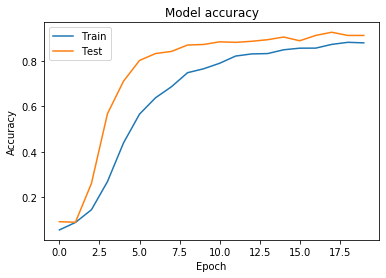

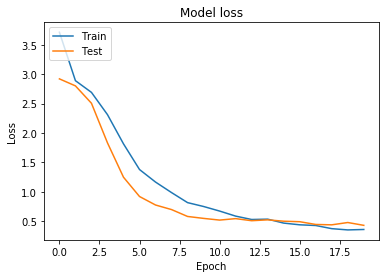

In [82]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(filepath)
    l=[]
    l1=[]
    op=[]
    pred=[]
    x, y, w, h = 33, 9, 20, 38
    for i in range(5):
    #Get bounding box
        cv2.rectangle(np.squeeze(img),(x,y),( x + w, y + h ),(0,255,0),1)
        l.append(np.squeeze(img[y:y+h,x:x+w]))
        x+=w
        
    for i in range(5):
        l1.append(np.expand_dims(l[i],axis=0).reshape(1, img_width, img_height, 1))
        op.append(model.predict_classes(tf.cast(l1[i], tf.float32))[0])

    for k in range(len(op)):
        pred.append(encoder.classes_[op[k]]){
         s = ''.join(pred)
    return s
    #plt.imshow(image)